<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [40]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [41]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
seaborn.set_context(context='talk', font_scale=1.2)
seaborn.__version__

'0.10.1'

In [42]:
dataset_base = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset_base.shape

(1620, 120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [43]:
score_cols = [col for col in dataset_base.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [44]:
dataset_base = dataset_base[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset_base[score_col] = pandas.to_numeric(dataset_base[score_col])
dataset_base = dataset_base.replace('Latin America & the Caribbean','LatAm')
dataset_base.tail()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0
1619,2008,HKG,Hong Kong,East Asia,NaN,10.0,10.0,10.0,10.0,10.0,9.13,12.0,9.11,1.0,9.12,1.0


In [45]:
dataset_base.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# Parte 1

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [46]:
pandas.to_numeric(dataset_base.year, downcast='integer')
dataset_base['year'] = pandas.to_numeric(dataset_base['year'], downcast='integer')
df = dataset_base
df = df.drop(['ISO_code', 'countries', 'region'], axis=1)# drop non numeric variables
max_row = df.max()
min_row = df.min()
min_row[0] = min_row[0].astype('int32')
max_row[0] = max_row[0].astype('int32')
ranges = max_row - min_row
range_df = pandas.DataFrame({'Min' : min_row,'Max' : max_row, "Range" : ranges})
round(range_df,2)

,Min,Max,Range
year,2008.00,2017.00,9.00
pf_identity_legal,0.00,10.00,10.00
pf_identity_sex_male,0.00,10.00,10.00
pf_identity_sex_female,0.00,10.00,10.00
pf_identity_sex,0.00,10.00,10.00
pf_identity_divorce,0.00,10.00,10.00
pf_identity,0.00,10.00,10.00
pf_score,2.22,9.56,7.34
pf_rank,1.00,162.00,161.00
ef_score,2.58,9.11,6.53


  2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

RESPUESTA: Para sacar conclusiones decidimos usar principalmente los promedios (mean) porque, entre las medidas de tendencia central, el *mean* es el estimador que incluye todos los datos. Eso no es el caso con la mediana. 

In [47]:
pf_identity_mean = dataset_base.pivot(index='year', columns='countries', values='pf_identity').mean()
pf_score_mean = dataset_base.pivot(index='year', columns='countries', values='pf_score').mean()
hf_score_mean = dataset_base.pivot(index='year', columns='countries', values='hf_score').mean()
ef_score_mean = dataset_base.pivot(index='year', columns='countries', values='ef_score').mean()
region = dataset_base.pivot(index='year', columns='countries', values='region').iloc[0]
dataset = pandas.DataFrame({"pf_identity" : pf_identity_mean, "pf_score": pf_score_mean, "hf_score": hf_score_mean,"ef_score": ef_score_mean, "region":region  })
dataset.head(10)

,pf_identity,pf_score,hf_score,ef_score,region
countries,,,,,
Albania,7.90,7.805,7.631,7.457,Eastern Europe
Algeria,1.17,5.269,5.165,5.061,Middle East & North Africa
Angola,5.34,5.690,5.442,5.194,Sub-Saharan Africa
Argentina,10.00,8.100,6.766,5.432,LatAm
Armenia,8.62,7.215,7.443,7.668,Caucasus & Central Asia
Australia,9.70,9.217,8.644,8.072,Oceania
Austria,10.00,9.207,8.476,7.744,Western Europe
Azerbaijan,7.90,6.121,6.172,6.225,Caucasus & Central Asia
Bahamas,10.00,7.941,7.656,7.372,LatAm


2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no. Eso no es el caso con la mediana.

In [48]:
# Create a subset for latin america and the carribean
grouped = dataset.groupby(['region'])
LatAm = grouped.get_group('LatAm')

In [49]:
descriptive_df = pandas.DataFrame({'index' : ['pf_identity_mean','pf_identity_std','pf_identity_median', \
                                              'hf_score_mean','hf_score_std','hf_score_median'], \
                                   'LatAm' : [ LatAm.pf_identity.mean(), \
                                              LatAm.pf_identity.std(), \
                                              LatAm.pf_identity.median(), \
                                              LatAm.hf_score.mean(), \
                                              LatAm.hf_score.std(), \
                                              LatAm.hf_score.median()], \
                                   "World" : [ dataset.pf_identity.mean(), \
                                              dataset.pf_identity.std(), \
                                              dataset.pf_identity.median(), \
                                              dataset.hf_score.mean(), \
                                              dataset.hf_score.std(), \
                                              dataset.hf_score.median()]})
round(descriptive_df.set_index('index'),2) # make it a little prettier

,LatAm,World
index,,
pf_identity_mean,8.59,7.12
pf_identity_std,1.47,3.18
pf_identity_median,9.01,8.69
hf_score_mean,7.04,6.92
hf_score_std,0.62,1.07
hf_score_median,6.98,6.80


  * ¿Tiene sentido calcular la moda? 
  *RESPUESTA*: No tiene mucho sentido calcular la moda porque no es muy relevante si se repita un valor en ninguna de las variables. 
  * ¿Cómo pueden sanearse los valores faltantes? 
  *RESPUESTA*: Por suerte, en pandas, cuando hay un valor faltante, osea un ```None```, no le incluye en el promedio. Todos los valores faltantes estan reemplazados por ```None```. 
  * ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos? 
  RESPUESTA: Usamos la regla de 1.5 * IQR (interquartile range) para identificar outliers. Fue mucho mas facil de encontrar outliers por grupo (en LatAm) que outliers globales.


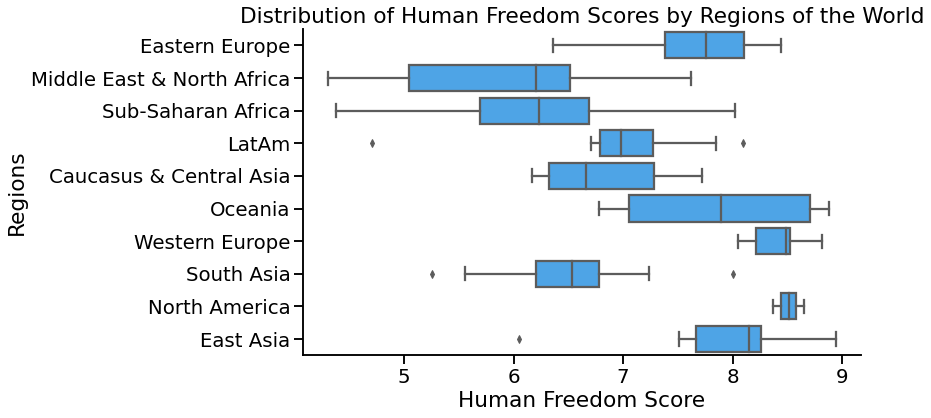

In [51]:
# The best way to quickly visualize outliers is with the box and whiskers plot (grafico de caja)
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='hf_score', y= 'region',
                color=BLUE)
plt.ylabel('Regions')
plt.xlabel('Human Freedom Score')
plt.title('Distribution of Human Freedom Scores by Regions of the World')
seaborn.despine()

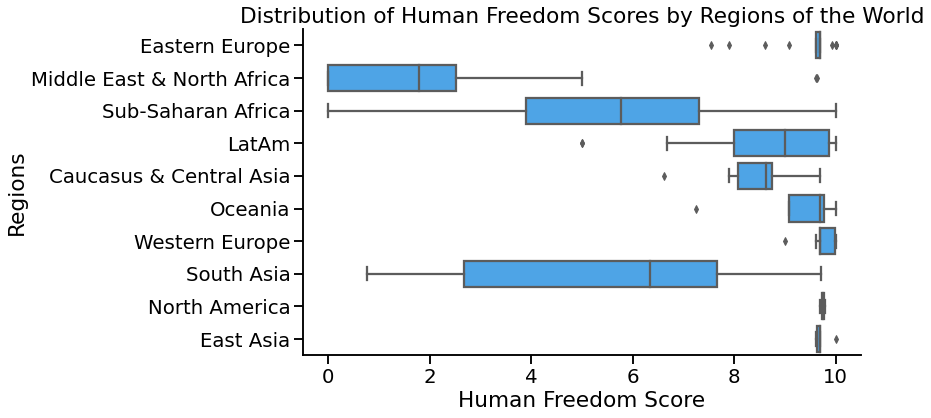

In [52]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='pf_identity', y= 'region',
                color=BLUE)
plt.ylabel('Regions')
plt.xlabel('Human Freedom Score')
plt.title('Distribution of Human Freedom Scores by Regions of the World')
seaborn.despine()

Como indica los diamantes negros al izquierda del whisker a la izquierda de LatAm, hay muchos outliers en nuestra region.

### Finding outliers method 1: usando 1.5*IQR

In [36]:
def find_outliers_hf(dataset):
    big_outlier = 0
    small_outlier = 0
    big_outliers = []
    small_outliers = []
    quartiles = dataset.hf_score.quantile([0.25,0.5,0.75]).round(2)
    quartiles = quartiles.tolist()
    IQR = quartiles[2]-quartiles[0] #calculate the interquartile range
    count = 0
    for idx, row in dataset.iterrows():
        if row.hf_score < quartiles[0]-1.5*IQR: 
            small_outlier += 1
            small_outliers.append(row.name)
        elif row.hf_score > quartiles[2]+1.5*IQR:
            big_outlier += 1
            big_outliers.append(row.name)
    text = "Econtramos {} big outlier, {},y {} small outliers {} para la dataset.".format(big_outlier, big_outliers,small_outlier,small_outliers)
    return text

In [37]:
def find_outliers_pf(dataset):
    big_outlier = 0
    small_outlier = 0
    big_outliers = []
    small_outliers = []
    quartiles = dataset.pf_identity.quantile([0.25,0.5,0.75]).round(2)
    quartiles = quartiles.tolist()
    IQR = quartiles[2]-quartiles[0] #calculate the interquartile range
    count = 0
    for idx, row in dataset.iterrows():
        if row.hf_score < quartiles[0]-1.5*IQR: 
            small_outlier += 1
            small_outliers.append(row.name)
        elif row.pf_identity > quartiles[2]+1.5*IQR:
            big_outlier += 1
            big_outliers.append(row.name)
    text = "Econtramos {} big outlier, {},y {} small outliers {} para la dataset.".format(big_outlier, big_outliers,small_outlier,small_outliers)
    return text

In [57]:
def find_outliers_ef(dataset):
    big_outlier = 0
    small_outlier = 0
    big_outliers = []
    small_outliers = []
    quartiles = dataset.ef_score.quantile([0.25,0.5,0.75]).round(2)
    quartiles = quartiles.tolist()
    IQR = quartiles[2]-quartiles[0] #calculate the interquartile range
    count = 0
    for idx, row in dataset.iterrows():
        if row.ef_score < quartiles[0]-1.5*IQR: 
            small_outlier += 1
            small_outliers.append(row.name)
        elif row.ef_score > quartiles[2]+1.5*IQR:
            big_outlier += 1
            big_outliers.append(row.name)
    text = "Econtramos {} big outlier, {},y {} small outliers {} para la dataset.".format(big_outlier, big_outliers,small_outlier,small_outliers)
    return text

In [59]:
print("HUMAN FREEDOM")
print(find_outliers_hf(dataset))
print(find_outliers_hf(LatAm))
print("PERSONAL FREEDOM")
print(find_outliers_pf(dataset))
print(find_outliers_pf(LatAm))
print("ECONOMIC FREEDOM")
print(find_outliers_ef(dataset))
print(find_outliers_ef(LatAm))

HUMAN FREEDOM
Econtramos 0 big outlier, [],y 0 small outliers [] para la dataset.
Econtramos 1 big outlier, ['Chile'],y 1 small outliers ['Venezuela'] para la dataset.
PERSONAL FREEDOM
Econtramos 0 big outlier, [],y 0 small outliers [] para la dataset.
Econtramos 0 big outlier, [],y 1 small outliers ['Venezuela'] para la dataset.
ECONOMIC FREEDOM
Econtramos 0 big outlier, [],y 1 small outliers ['Venezuela'] para la dataset.
Econtramos 0 big outlier, [],y 1 small outliers ['Venezuela'] para la dataset.


Usando este criteria encontramos más outliers en LatAm que en el mundo. 

En principio decidimos no sacar los outliers, porque opinamos que la data generado por Cato no debe tener tantos errores de medida como los errores que suele pasar con los datos sacado por una maquina. Si tiene errores son hecho de humanos. Y puede ser que los outliers reflejan algo de la realidad de los subjetos que estamos estudiando.  
Mas adelante, en seccion 1.4 sacamos los outliers, para poder hacer correlation. 

## 2. Agregación de datos  - Pablo & Karen

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 3. Distribuciones - Flor 
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


## 4. Correlaciones y Relaciones -  Gonzalo

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [93]:
from scipy import stats

In [94]:
stats.kstest(LatAm.hf_score, 'norm')

/Users/brandonjanes/miniconda2/envs/kunan_ai/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/brandonjanes/miniconda2/envs/kunan_ai/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/brandonjanes/miniconda2/envs/kunan_ai/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


KstestResult(statistic=nan, pvalue=nan)

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?